In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append("..")

In [2]:
import matplotlib as mpl

mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['xtick.labelsize'] = 19
mpl.rcParams['ytick.labelsize'] = 19
mpl.rcParams["axes.labelsize"] = 26
mpl.rcParams['legend.fontsize'] = 22
mpl.rcParams['axes.titlesize'] = 26
mpl.rcParams['text.usetex'] = True

In [3]:
def extremile(t, r):
    return r * t ** (r - 1)

def superquantile(t, q):
    return np.ones(len(t)) / (1 - q) * (t >= q)

def esrm(t, rho):
    return rho * math.exp(-rho) * np.exp(rho * t) / (1 - math.exp(-rho))

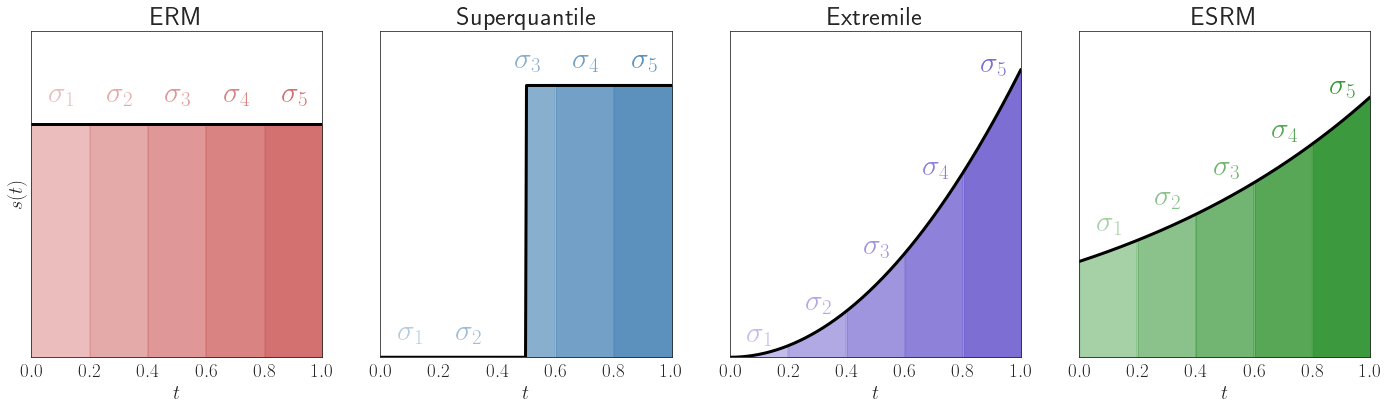

In [6]:
sns.set_style("white")

linewidth = 3
n = 5

fig, ax = plt.subplots(1, 4, figsize=(24, 6))

t = np.linspace(0, 1, 300)
interval = len(t) // n
pad = 0

sigmas = [r"$\sigma_1$", r"$\sigma_2$", r"$\sigma_3$", r"$\sigma_4$", r"$\sigma_5$"]

# ERM.
color = "indianred"
s = np.ones(len(t))
ax[0].plot(t, s, linewidth=linewidth, color="k")
ax[0].set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
pads = [0.07, 0.07, 0.07, 0.07, 0.07]
for i in range(n):
    lower = i * interval
    upper = (i + 1) * interval
    if i != 0:
        lower -= pad
    if i != n - 1:
        upper += pad
    t_int, s_int = t[lower : upper], s[lower : upper]
    ax[0].fill_between(t_int, s_int, color=color, alpha=0.4 + i * 0.12)
    loc = (lower + upper) // 2
    ax[0].text(t[loc] - 0.04, s[loc] + pads[i] + 0.03, sigmas[i], fontsize=30, color=color, alpha=0.4 + i * 0.12)

ax[0].set_title("ERM")
ax[0].set_xlim(-0.00, 1.00)
ax[0].set_ylim(-0.00, s.max() + 0.4)
ax[0].set_yticks([])
ax[0].set_ylabel(r"$s(t)$", fontsize=20)
ax[0].set_xlabel(r"$t$", fontsize=20)

# Superquantile.
color = "steelblue"
s = superquantile(t, 0.5)
ax[1].plot(t, s, linewidth=linewidth, color="k")
ax[1].set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
pads = [0.1, 0.1, 0.1, 0.1, 0.1]
for i in range(n):
    lower = i * interval
    upper = (i + 1) * interval
    if i != 0:
        lower -= pad
    if i != n - 1:
        upper += pad
    t_int, s_int = t[lower : upper], s[lower : upper]
    ax[1].fill_between(t_int, s_int, color=color, alpha=0.4 + i * 0.12)
    loc = (lower + upper) // 2
    ax[1].text(t[loc] - 0.04, s[loc] + pads[i] + 0.03, sigmas[i], fontsize=30, color=color, alpha=0.4 + i * 0.12)

ax[1].set_title("Superquantile")
ax[1].set_xlim(-0.00, 1.00)
ax[1].set_ylim(-0.00, s.max() + 0.4)
ax[1].set_yticks([])
ax[1].set_xlabel(r"$t$", fontsize=20)

# Extremile.
color = "slateblue"
s = extremile(t, 3.0)
ax[2].plot(t, s, linewidth=linewidth, color="k")
ax[2].set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
pads = [0.1, 0.2, 0.3, 0.4, 0.5]
for i in range(n):
    lower = i * interval
    upper = (i + 1) * interval
    if i != 0:
        lower -= pad
    if i != n - 1:
        upper += pad
    t_int, s_int = t[lower : upper], s[lower : upper]
    ax[2].fill_between(t_int, s_int, color=color, alpha=0.4 + i * 0.12)
    loc = (lower + upper) // 2
    ax[2].text(t[loc] - 0.04, s[loc] + pads[i] + 0.03, sigmas[i], fontsize=30, color=color, alpha=0.4 + i * 0.12)

ax[2].set_title("Extremile")
ax[2].set_xlim(-0.00, 1.00)
ax[2].set_ylim(-0.00, s.max() + 0.4)
ax[2].set_yticks([])
ax[2].set_xlabel(r"$t$", fontsize=20)
# ax[2].set_ylabel(r"$s(t)$", fontsize=20)

# ESRM.
color = "forestgreen"
s = esrm(t, 1.0)
ax[3].plot(t, s, linewidth=linewidth, color="k")
ax[3].set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
pads = [0.1, 0.11, 0.12, 0.13, 0.14]
for i in range(n):
    lower = i * interval
    upper = (i + 1) * interval
    if i != 0:
        lower -= pad
    if i != n - 1:
        upper += pad
    t_int, s_int = t[lower : upper], s[lower : upper]
    ax[3].fill_between(t_int, s_int, color=color, alpha=0.4 + i * 0.12)
    loc = (lower + upper) // 2
    ax[3].text(t[loc] - 0.04, s[loc] + pads[i] + 0.03, sigmas[i], fontsize=30, color=color, alpha=0.4 + i * 0.12)

ax[3].set_title("ESRM")
ax[3].set_xlim(-0.00, 1.00)
ax[3].set_ylim(-0.00, s.max() + 0.4)
ax[3].set_yticks([])
ax[3].set_xlabel(r"$t$", fontsize=20)
# ax[1, 1].set_ylabel(r"$s(t)$", fontsize=20)

plt.savefig("../figures/sigma.pdf")